In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

# 第五章 大数定律及中心极限定理

## 1 大数定律

### 弱大数定理(辛钦大数定理)

设随机变量 $X_1, X_2, ...$ 相互独立，服从同一分布且具有数学期望 $E(X_k)=\mu\;(k=1,2,...)$，
则序列 $\bar{X}=\frac{1}{n}\sum_{k=1}^{n}X_k$ 依概率收敛于 $\mu$，即 $\bar{X}\overset{P}{\longrightarrow}\mu$

简单的理解：样本数量足够多的时候，样品事件的频率趋近于概率。

## 中心极限定理

### 定理一（独立同分布的中心极限定理）

设随机变量 $X_1, X_2, ..., X_n, ...$ 相互独立，服从同一分布且具有数学期望和方差 $E(X_k)=\mu,\; D(X)=\sigma^2>0 \;(k=1,2,...)$，
则随机变量之和 $\sum_{k=1}^{n}X_k$ 的标准化变量
$$
Y_n=\frac{\sum_{k=1}^{n}X_k-E(\sum_{k=1}^{n}X_k)}{\sqrt{D(\sum_{k=1}^{n}X_k)}}=\frac{\sum_{k=1}^{n}X_k-n\mu}{\sqrt{n}\sigma}
$$

的分布函数 $F_n(x)$ 对于任意 $x$ 满足

$$
\begin{aligned}
\lim_{n \to +\infty}F_n(x) & = \lim_{n \to +\infty}P\left\{ \frac{\sum_{k=1}^{n}X_k-n\mu}{\sqrt{n}\sigma}\le x \right\} \\
  & = \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi}}e^{-t^2/2}dt=\Phi(x)
\end{aligned}
$$

**对定理一的理解：**

同分布的多个变量之和，当n充分大时，近似服从标准正态分布 $N(0,1)$

$$
\frac{\bar{X}-\mu}{\sigma/\sqrt{n}}\overset{近似地}{\sim}N(0,1) 或 \bar{X}\overset{近似地}{\sim}N(\mu,\sigma^2/n)
$$

### 定理二（李雅普诺夫(Lyapunov)定理）

设随机变量 $X_1, X_2, ..., X_n, ...$ 相互独立，它们具有数学期望和方差
$$
E(X_k)=\mu_k, \; D(X_k)=\sigma_k^2>0, \; k=1,2,...
$$

记
$$
B_n^2=\sum_{k=1}^{n}{\sigma_k^2}
$$

若存在正整数 $\delta$，使得当 $n \to \infty$ 时，
$$
\frac{1}{B_n^{2+\delta}} \sum_{k=1}{n}E\{ \left|X_k-\mu_k \right|^{2+\delta} \} \to 0
$$

则随机变量之和 $\sum_{k=1}^{n}X_k$ 的标准化变量
$$
Z_n=\frac{\sum_{k=1}^{n}X_k-E(\sum_{k=1}^{n}X_k)}{\sqrt{D(\sum_{k=1}^{n}X_k)}}=\frac{\sum_{k=1}^{n}X_k-\sum_{k=1}^{n}\mu_k}{B_n}
$$

的分布函数 $F_n(x)$ 对于任意 $x$，满足
$$
\begin{aligned}
\lim_{n \to +\infty}F_n(x) & = \lim_{n \to +\infty}P\left\{ \frac{\sum_{k=1}^{n}X_k-\sum_{k=1}^{n}\mu_k}{B_n} \le x \right\} \\
  & = \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi}}e^{-t^2/2}dt=\Phi(x)
\end{aligned}
$$

**对定理二的理解**

无论各个随机变量服从什么分布，当n充分大时，它们的和近似服从正态分布。


### 定理三（棣莫弗-拉普拉斯(De Moivre-Laplace)定理）

设随机变量 $\eta_n \;(n=1,2,...)$ 服从参数为 $n,p \;(0<p<1)$ 的二项分布，则对于任意 $x$，有
$$
\begin{aligned}
\lim_{n \to +\infty} P\left\{ \frac{\eta_n - np}{\sqrt{np(1-p)}} \le x \right\} 
   = \int_{-\infty}^{x} \frac{1}{\sqrt{2\pi}}e^{-t^2/2}dt=\Phi(x)
\end{aligned}
$$

**定理三是定理一的特殊情况**

### 例子

二项分布B(5000, 0.3)

np	: 1500.0
np(1-p)	: 1050.0


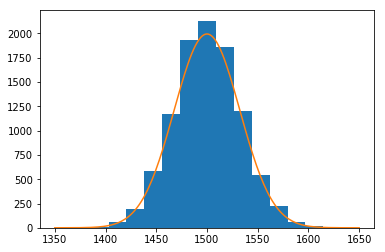

In [18]:
from math import sqrt

n = 5000
p = 0.3
data = st.binom.rvs(n, p, size=10000)

e = n*p
sigma2 = n*p*(1-p)
print('np\t:', e)
print('np(1-p)\t:', sigma2)

# 显示的值范围
r = (1350, 1650)
bins = 17
# 绘制频率直方图
plt.hist(data, bins=bins, range=r)

# 绘制正态分布的概率密度曲线
x = (np.linspace(r[0], r[1], bins*10) - e) / sqrt(sigma2)
y = st.norm.pdf(x)
plt.plot(np.linspace(r[0], r[1], bins*10), y*n)

**例题**

一公寓有200户住户，一户住户拥有汽车辆数 $X$ 的分布律为

|X|0|1|2|
|---|---|---|---|
|pk|0.1|0.6|0.3|

问需要多少车位，才能使每辆汽车都具有一个车位的概率至少为0.95。

解法:

$ E(X_k) = 0\times0.1+1\times0.6+2\times0.3=1.2$

$ E(X_k^2) = 0\times0.1+1\times0.6+2^2\times0.3=1.8$

$ D(X_k) = E(X_k^2)-E(X)^2 = 1.8 - 1.2^2 = 0.36 $

因此近似地有 $ \sum_{k=1}^{k=200}X_k \sim N(200\times1.2, 200\times0.36)=N(240,\sqrt{72}) $

为了满足
$$
\begin{aligned}
P \lgroup \sum_{k=1}^{k=200}X_k \le n \rgroup &\ge 0.95 \\
\Phi \left(\frac{n-240}{\sqrt{72}} \right) &\ge 0.95
\end{aligned}
$$

因为 $0.95=\Phi(1.645)$
所以
$$
\frac{n-240}{\sqrt{72}} \ge 1.645 \\
n \ge 253.96
$$

至少需要254个车位

**思考题**

某种电子器件的寿命（小时）具有数学期望 $\mu$（未知），方差 $\sigma^2=400$。为了估计 $\mu$，随机地取 $n$ 只这种器件，在时刻 $t=0$ 投入测试（测试相互独立）直到失效，测得其寿命为 $X_1,X_2,...,X_n$，以 $\bar{X}=\frac{1}{n}\sum_{i=1}^{n}X_i$ 作为 $\mu$ 的估计，为使 ${P\{|\bar{X}-\mu|<1\}} \ge 0.95$，问 $n$ 至少为多少?